In [1]:
import sys
sys.path.insert(1, '../..')

import torch
import torch.nn as nn
import random
import pandas as pd
import numpy as np
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

torch.manual_seed(33)
np.random.seed(33)
random.seed(33)

from library.evaluation import ConfusionMatrix

dataset_name = "Combined-TF"
unique_name = "DistilBERT_Finetuned"

c:\Users\msi_b\anaconda3\envs\pytorch-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Twitter15

twitter15_vectors = np.loadtxt("../../data/vectors/Twitter15-TF_DistilBERT_base_finetuned_vectors.txt", delimiter=",")
twitter15_vectors.shape

(742, 768)

In [3]:
twitter15_data = pd.read_csv("../../data/processed/twitter15-tf_dataset.csv", lineterminator="\n")
twitter15_data = twitter15_data[["tweet_id", "tweet_text", "label","tvt2"]]
twitter15_data

,tweet_id,tweet_text,label,tvt2
0,551099691702956032,rip elly may clampett: so sad to learn #beverl...,True,training
1,514106273852174337,just in: missing afghan soldiers found trying ...,True,training
2,495366618818830336,#riphulkhogan my heart is ripping like your sh...,False,training
3,532206910796468224,a chick-fil-a manager allegedly banned this hi...,False,validation
4,560187970389819392,islamic tribunal using sharia law in texas has...,False,validation
...,...,...,...,...
737,528242965915779072,officials took away this halloween decoration ...,True,validation
738,407205235682050048,r.i.p to the driver that died with paul walker...,True,training
739,508002575858561024,"pentagon confirms ahmed abdi godane, a leader ...",True,validation
740,427780584979836929,marlboro ad man eric lawson dies of chronic lu...,True,training


In [4]:
# Twitter16

twitter16_vectors = np.loadtxt("../../data/vectors/Twitter16-TF_DistilBERT_base_finetuned_vectors.txt", delimiter=",")
twitter16_vectors.shape

(412, 768)

In [5]:
twitter16_data = pd.read_csv("../../data/processed/twitter16-tf_dataset.csv", lineterminator="\n")
twitter16_data = twitter16_data[["tweet_id", "tweet_text", "label","tvt2"]]
twitter16_data

,tweet_id,tweet_text,label,tvt2
0,656955120626880512,correct predictions in back to the future ii U...,False,training
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...,True,testting
2,613404935003217920,cops bought the alleged church shooter burger ...,False,validation
3,614467824313106432,god put a rainbow over the white house 🌈 URL\r,True,validation
4,622891631293935616,#wakeupamerica🇺🇸 who needs a #gun registry whe...,False,training
...,...,...,...,...
407,552806757672964097,update: 12 now confirmed dead in #charliehebdo...,True,training
408,544350567183556608,we can see people coming out a firedoor near t...,True,training
409,614593386188828672,white house lit in rainbow colors following us...,True,training
410,650046859537448960,an openly gay man said that he and his partner...,True,training


In [6]:
# Pheme2

pheme2_vectors = np.loadtxt("../../data/vectors/Phemernr2-TF_DistilBERT_base_finetuned_vectors.txt", delimiter=",")
pheme2_vectors.shape

(1705, 768)

In [7]:
pheme2_data = pd.read_csv("../../data/processed/Phemernr2-tf_dataset.csv", sep=",")
pheme2_data = pheme2_data[["tweet_id", "tweet_text", "label","tvt2"]]
pheme2_data

,tweet_id,tweet_text,label,tvt2
0,580318210609696769,BREAKING - A Germanwings Airbus A320 plane rep...,True,training
1,552798891994009601,Reports that two of the dead in the #CharlieHe...,True,training
2,580352540316946432,'No survivors' in #Germanwings crash says Fren...,False,training
3,524983403775799297,Tragedy mounts as soldier shot this AM dies of...,True,training
4,544511915158810624,Watch the moment gunfire and explosions were h...,True,training
...,...,...,...,...
1700,580333909008871424,French junior minister for Transport Alain Vid...,True,training
1701,536847243631149056,Bern museum accepts Gurlitt's problematic bequ...,True,training
1702,500364290545958912,#Ferguson chief said the officer was unaware o...,True,training
1703,552816302780579840,“I don’t feel as though I’m killing someone wi...,False,testting


In [8]:
# Combination

vectors = np.concatenate((twitter15_vectors, twitter16_vectors, pheme2_vectors), axis=0)
vectors.shape

(2859, 768)

In [9]:
data = pd.concat([twitter15_data, twitter16_data, pheme2_data])
data

,tweet_id,tweet_text,label,tvt2
0,551099691702956032,rip elly may clampett: so sad to learn #beverl...,True,training
1,514106273852174337,just in: missing afghan soldiers found trying ...,True,training
2,495366618818830336,#riphulkhogan my heart is ripping like your sh...,False,training
3,532206910796468224,a chick-fil-a manager allegedly banned this hi...,False,validation
4,560187970389819392,islamic tribunal using sharia law in texas has...,False,validation
...,...,...,...,...
1700,580333909008871424,French junior minister for Transport Alain Vid...,True,training
1701,536847243631149056,Bern museum accepts Gurlitt's problematic bequ...,True,training
1702,500364290545958912,#Ferguson chief said the officer was unaware o...,True,training
1703,552816302780579840,“I don’t feel as though I’m killing someone wi...,False,testting


In [10]:
labels_str = data['label'].unique().tolist()
labels_str

[True, False]

In [11]:
labels = []
for i, d in data.iterrows():
    lab = labels_str.index(d['label'])
#     labels.append([1 if j == lab else 0 for j in range(len(labels_str))])
    labels.append(lab)
labels[:10]

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1]

In [12]:
train_vectors = np.array([vectors[i] for i, d in data.iterrows() if d['tvt2'] == 'training'])
val_vectors = np.array([vectors[i] for i, d in data.iterrows() if d['tvt2'] == 'validation'])
test_vectors = np.array([vectors[i] for i, d in data.iterrows() if d['tvt2'] == 'testting'])

train_labels = np.array([labels[i] for i, d in data.iterrows() if d['tvt2'] == 'training'])
val_labels = np.array([labels[i] for i, d in data.iterrows() if d['tvt2'] == 'validation'])
test_labels = np.array([labels[i] for i, d in data.iterrows() if d['tvt2'] == 'testting'])

In [13]:
print(train_vectors.shape)
print(val_vectors.shape)
print(test_vectors.shape)

print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(1948, 768)
(621, 768)
(290, 768)
(1948,)
(621,)
(290,)


In [14]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import os
from typing import Callable


class NNModel(nn.Module):
    def __init__(
        self,
        n_input: int,
        n_output: int = 1
    ):
        super(NNModel, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(n_input, 512),
            nn.LeakyReLU(0.1),
#             nn.BatchNorm1d(512),
            nn.Dropout(p=0.5),
            nn.Linear(512, 128),
            nn.LeakyReLU(0.1),
#             nn.BatchNorm1d(512),
            nn.Dropout(p=0.5),
            nn.Linear(128, n_output)
        )

    def forward(self, input):
        return self.main(input)
    

class NNClassifier:
    def __init__(self,
        n_input: int,
        n_output: int = 1,
        criterion: Callable = nn.BCELoss,
        beta1: float = 0.5,
        lr: float = 0.0002,
        device: str = None
    ):
        super(NNClassifier, self).__init__()
        self.model = NNModel(n_input, n_output)

        self.criterion = criterion()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr, betas=(beta1, 0.999), weight_decay=1e-5)

        if not device or device not in ['cpu', 'cuda']:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        else:
            self.device = device

        self.model = self.model.to(self.device)
        if self.device == 'cuda':
            self.model = torch.nn.DataParallel(self.model)
            cudnn.benchmark = True
    
    def load_pretrained(self, filepath: str, key: str = "net", is_parallel: bool = False):
        checkpoint = torch.load(filepath)
        if is_parallel:
            self.model = torch.nn.DataParallel(self.model)
            cudnn.benchmark = True

        print(f"loading model from {filepath}...")
#         print(checkpoint[key])
        self.model.load_state_dict(checkpoint[key], strict=False)
    
    def save_model(self, saves: str):
        print(f"Saving model...")
        state = {
            'net': self.model.state_dict()
        }
        if not os.path.isdir('models'):
            os.mkdir('models')
        torch.save(state, f"../../data/models/{saves}.pth")
    
    def train_eval(self,
        train_x, train_y,
        test_x, test_y,
        n_iter: int = 100,
        batch_size: int = 128,
        saves: str = None
    ):
        trainset = torch.utils.data.TensorDataset(train_x, train_y) # create your datset
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size) # create your dataloader

        testset = torch.utils.data.TensorDataset(test_x, test_y) # create your datset
        testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size) # create your dataloader

        train_accs = []
        train_losses = []
        test_accs = []
        test_losses = []

        print(f"Using {self.device}")
        best_acc = 0
        current_loss = 1000
        best_test_acc = 0
        epoch = 0
        start_time = time.time()
        results = {}
        while True:
            epoch += 1
            self.model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0
            for idx, (inputs, targets) in enumerate(trainloader):
                self.optimizer.zero_grad()
                inputs, targets=inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets.long())
                loss.backward()
                self.optimizer.step()

                _, predicted = outputs.max(1)
                train_loss += loss.item()
                train_total += targets.size(0)
                train_correct += predicted.eq(targets).sum().item()
            
            train_acc=100.*train_correct/train_total
            train_accs.append(train_acc)
            train_losses.append(train_loss/len(trainloader))
            

            self.model.eval()
            test_loss = 0
            test_correct = 0
            test_total = 0
            # test_acc = 0
            with torch.no_grad():
                for idx, (inputs, targets) in enumerate(testloader):
                    inputs, targets = inputs.to(self.device), targets.to(self.device)
                    outputs = self.model(inputs)
                    loss = self.criterion(outputs, targets.long())
                    test_loss += loss.item()
            
                    _, predicted = outputs.max(1)
                    test_total += targets.size(0)
                    test_correct += predicted.eq(targets).sum().item()
                
            test_acc=100.*test_correct/test_total
            test_accs.append(test_acc)
            test_losses.append(test_loss/len(testloader))
            
            if (epoch) % round(n_iter/20) == 0:
                print(f"-- Epoch {epoch}, Train_Accuracy : {train_acc}, Test Accuracy : {test_acc}, Train Loss : {train_loss}, Test Loss : {test_loss}")

            # Save checkpoint.
            # if saves and test_loss < best_loss:
            #     print(f"Saving after new best loss : {test_loss}")
            #     best_loss = test_loss
            if saves and test_acc > best_test_acc:
                print(f"Saving after new best accuracy : {test_acc}")
                best_test_acc = test_acc

                state = {
                    'net': self.model.state_dict(),
                }
                if not os.path.isdir('models'):
                    os.mkdir('models')
                torch.save(state, f"../../data/models/{saves}.pth")
            
            if epoch >= n_iter:
                break
            
        # visualizing accuracy over epoch
        fig, ax2 = plt.subplots(1)
        plt.subplots_adjust(hspace=1.5, wspace=0.4)
        ax2.plot([i for i in range(len(train_accs))], train_accs, label='Training Accuracy')
        ax2.plot([i for i in range(len(test_accs))], test_accs, label='Validation Accuracy')
        ax2.set_ylabel('Accuracy')
        ax2.set_xlabel('Epoch')
        # ax2.set_xlim(0, len(train_losses))
        # ax2.set_ylim(min([min(train_losses), min(test_losses)])*0.1, max([max(train_losses), max(test_losses)]))
        ax2.title.set_text(f"Training and Validation Accuracy Over Time (epoch)")
        ax2.legend(loc='lower right')

        plt.show()
        fig.savefig(f"../../Grafik/Accuracy/{dataset_name}_2LayerNet_L2Reg_{unique_name}_Accuracy_Graph.png")
        
        # visualizing accuracy over epoch
        fig, ax2 = plt.subplots(1)
        plt.subplots_adjust(hspace=1.5, wspace=0.4)
        ax2.plot([i for i in range(len(train_losses))], train_losses, label='Training Loss')
        ax2.plot([i for i in range(len(test_losses))], test_losses, label='Validation Loss')
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epoch')
        # ax2.set_xlim(0, len(train_losses))
        # ax2.set_ylim(min([min(train_losses), min(test_losses)])*0.1, max([max(train_losses), max(test_losses)]))
        ax2.title.set_text(f"Training and Validation Loss Over Time (epoch)")
        ax2.legend(loc='center right')

        plt.show()
        fig.savefig(f"../../Grafik/Loss/{dataset_name}_2LayerNet_L2Reg_{unique_name}_Loss_Graph.png")
    
    def predict(self, input_x):
        self.model.eval()
        with torch.no_grad():
            preds = self.model(torch.Tensor(input_x))
            preds = torch.log_softmax(preds, dim = 1)
            _, preds = torch.max(preds, dim = 1)
            return preds

Multiclass Classification using 2-Layer Linear Network
Using cuda
Saving after new best accuracy : 90.17713365539453
Saving after new best accuracy : 90.98228663446055
Saving after new best accuracy : 91.62640901771337
Saving after new best accuracy : 91.78743961352657
Saving after new best accuracy : 91.94847020933977
Saving after new best accuracy : 92.5925925925926
Saving after new best accuracy : 92.7536231884058
Saving after new best accuracy : 93.0756843800322
Saving after new best accuracy : 93.23671497584542
Saving after new best accuracy : 93.39774557165862
Saving after new best accuracy : 93.55877616747182
Saving after new best accuracy : 93.88083735909822
Saving after new best accuracy : 94.20289855072464
Saving after new best accuracy : 94.36392914653784
Saving after new best accuracy : 94.68599033816425
Saving after new best accuracy : 94.84702093397746
Saving after new best accuracy : 95.00805152979066
Saving after new best accuracy : 95.16908212560386
Saving after new be

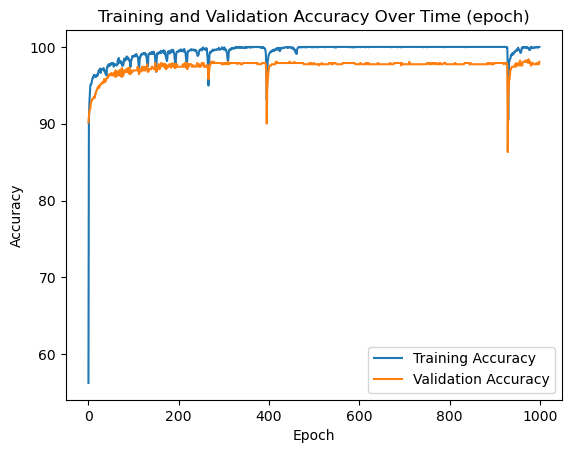

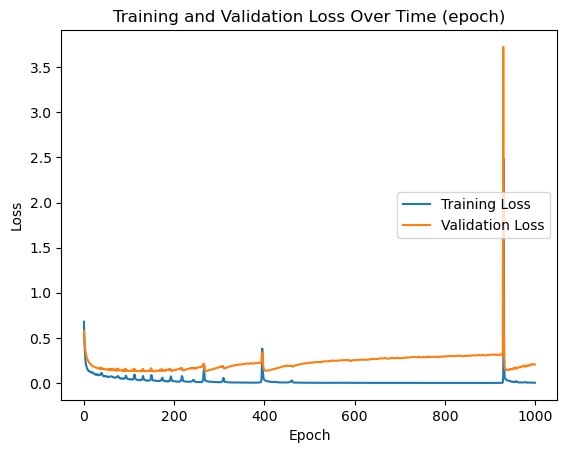

Exec Time : 26.71 seconds
loading model from ../../data/models/Combined-TF_2LayerNet_L2Reg_DistilBERT_Finetuned.pth...

Train Set
Predictions : torch.Size([1948])
Binary Class Evaluation

True Positive : 951
False Positive : 0
False Negative : 0
True Negative : 997

Class False Evaluation
- Precision : 100.0 %
- Recall : 100.0 %
- F1 : 1.0

Class True Evaluation
- Precision : 100.0 %
- Recall : 100.0 %
- F1 : 1.0

Combined Evaluation
- Accuracy : 100.0 %
- Precision : 100.0 %
- Recall : 100.0 %
- F1 : 1.0
- Average Confidence : 100.0 %
Model, Combined,,,,False,,,True,,,
Combined-TF_2LayerNet_L2Reg_DistilBERT_Finetuned Train, 100.0, 100.0, 100.0, 1.0, 100.0, 100.0, 1.0, 100.0, 100.0, 1.0, 
Confusion Matrix Scikit-learn: 
[[997   0]
 [  0 951]]


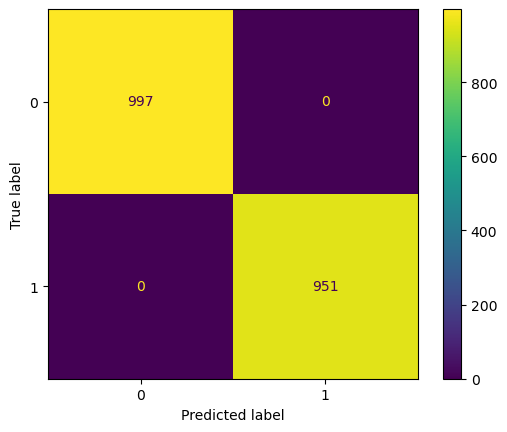


Validation Set
Predictions : torch.Size([621])
Binary Class Evaluation

True Positive : 275
False Positive : 6
False Negative : 4
True Negative : 336

Class False Evaluation
- Precision : 97.865 %
- Recall : 98.566 %
- F1 : 0.98214

Class True Evaluation
- Precision : 98.824 %
- Recall : 98.246 %
- F1 : 0.98534

Combined Evaluation
- Accuracy : 98.39 %
- Precision : 98.344 %
- Recall : 98.406 %
- F1 : 0.98375
- Average Confidence : 100.0 %
Model, Combined,,,,False,,,True,,,
Combined-TF_2LayerNet_L2Reg_DistilBERT_Finetuned Validation, 98.39, 98.344, 98.406, 0.98375, 97.865, 98.566, 0.98214, 98.824, 98.246, 0.98534, 
Confusion Matrix Scikit-learn: 
[[336   6]
 [  4 275]]


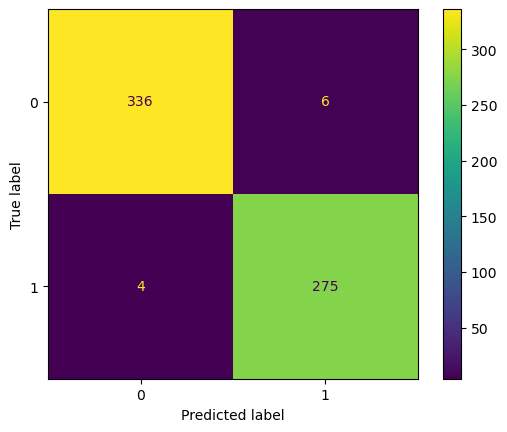


Test Set
Predictions : torch.Size([290])
Binary Class Evaluation

True Positive : 132
False Positive : 3
False Negative : 5
True Negative : 150

Class False Evaluation
- Precision : 97.778 %
- Recall : 96.35 %
- F1 : 0.97059

Class True Evaluation
- Precision : 96.774 %
- Recall : 98.039 %
- F1 : 0.97403

Combined Evaluation
- Accuracy : 97.241 %
- Precision : 97.276 %
- Recall : 97.195 %
- F1 : 0.97235
- Average Confidence : 100.0 %
Model, Combined,,,,False,,,True,,,
Combined-TF_2LayerNet_L2Reg_DistilBERT_Finetuned Test, 97.241, 97.276, 97.195, 0.97235, 97.778, 96.35, 0.97059, 96.774, 98.039, 0.97403, 
290
290
Confusion Matrix Scikit-learn: 
[[150   3]
 [  5 132]]


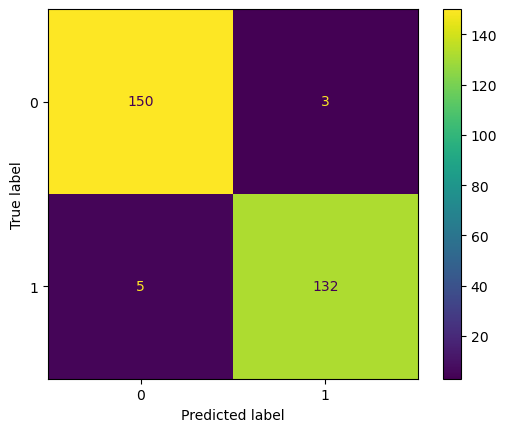

In [15]:
print("Multiclass Classification using 2-Layer Linear Network")
start = time.time()
model_name = f"{dataset_name}_2LayerNet_L2Reg_{unique_name}"
model = NNClassifier(train_vectors.shape[1], n_output=2, criterion=nn.CrossEntropyLoss)
model.train_eval(torch.Tensor(train_vectors),
                torch.Tensor(train_labels),
                torch.Tensor(val_vectors),
                torch.Tensor(val_labels),
                saves=model_name,
                n_iter=1000,
                batch_size=512)
print(f"Exec Time : {round(time.time() - start, 2)} seconds")

model.load_pretrained(f"../../data/models/{model_name}.pth")

print("\nTrain Set")
preds = model.predict(train_vectors)
print(f"Predictions : {preds.shape}")

preds = preds.cpu().numpy()

conf_mat = ConfusionMatrix(
    labels=np.array(train_labels),
    predictions=np.array(preds),
    binary=True,
    model_name=f"{model_name} Train"
)
conf_mat.evaluate(classes=labels_str)

labels=np.array(train_labels)
predictions=np.array(preds)
cm = confusion_matrix(labels, predictions, labels=[0,1])
print(f'Confusion Matrix Scikit-learn: \n{cm}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

print("\nValidation Set")
preds = model.predict(val_vectors)
print(f"Predictions : {preds.shape}")

preds = preds.cpu().numpy()

conf_mat = ConfusionMatrix(
    labels=np.array(val_labels),
    predictions=np.array(preds),
    binary=True,
    model_name=f"{model_name} Validation"
)
conf_mat.evaluate(classes=labels_str)

labels=np.array(val_labels)
predictions=np.array(preds)
cm = confusion_matrix(labels, predictions, labels=[0,1])
print(f'Confusion Matrix Scikit-learn: \n{cm}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

print("\nTest Set")
preds = model.predict(test_vectors)
print(f"Predictions : {preds.shape}")

preds = preds.cpu().numpy()

conf_mat = ConfusionMatrix(
    labels=np.array(test_labels),
    predictions=np.array(preds),
    binary=True,
    model_name=f"{model_name} Test"
)
conf_mat.evaluate(classes=labels_str)

labels=np.array(test_labels)
predictions=np.array(preds)
print(len(labels))
print(len(predictions))
cm = confusion_matrix(labels, predictions, labels=[0,1])
print(f'Confusion Matrix Scikit-learn: \n{cm}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()